In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# 1. LOAD DATASET

df = pd.read_csv("diabetes.csv")

# Choose a variable that must be strictly positive
# Box-Cox requires all values > 0
# 'Glucose' fits this condition (no zero values ideally)
x = df["Glucose"]

# If any zero exists, replace with a small constant (Box-Cox requirement)
x = x.replace(0, 0.001)

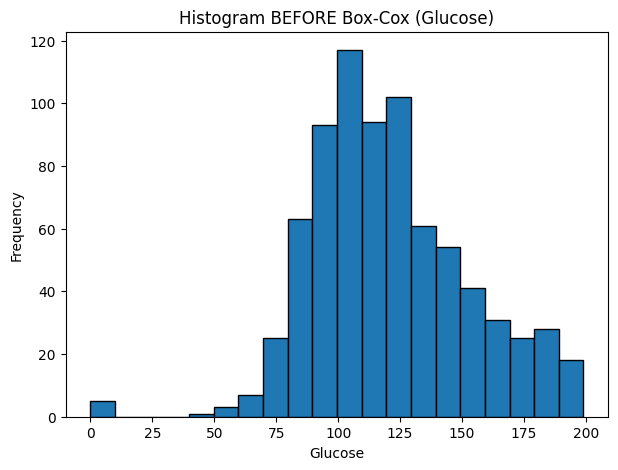

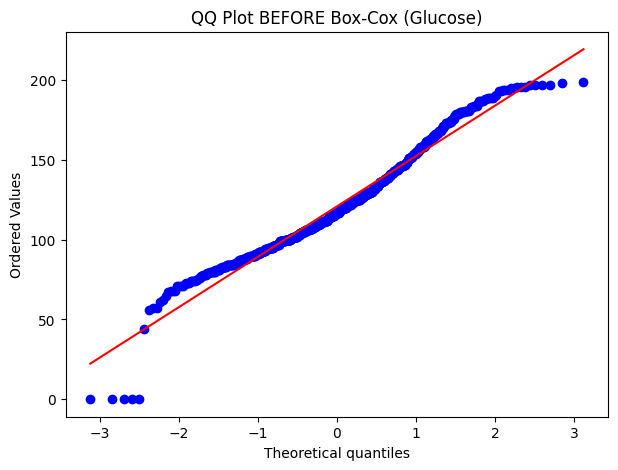

In [5]:
# 2. HISTOGRAM + QQ-PLOT BEFORE BOX-COX


plt.figure(figsize=(7,5))
plt.hist(x, bins=20, edgecolor='black')
plt.title("Histogram BEFORE Box-Cox (Glucose)")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(7,5))
stats.probplot(x, dist="norm", plot=plt)
plt.title("QQ Plot BEFORE Box-Cox (Glucose)")
plt.show()


In [7]:
# 3. NORMALITY TEST BEFORE BOX-COX


stat_before, p_before = stats.shapiro(x)
print("Shapiro-Wilk BEFORE Box-Cox:")
print("Statistic:", stat_before)
print("p-value:", p_before)


# 4. APPLY BOX–COX TRANSFORMATION


x_boxcox, lambda_bc = stats.boxcox(x)

print("\nBox-Cox Lambda value:", lambda_bc)

Shapiro-Wilk BEFORE Box-Cox:
Statistic: 0.9701042028980539
p-value: 1.9867484606141267e-11

Box-Cox Lambda value: 0.8732924453523542


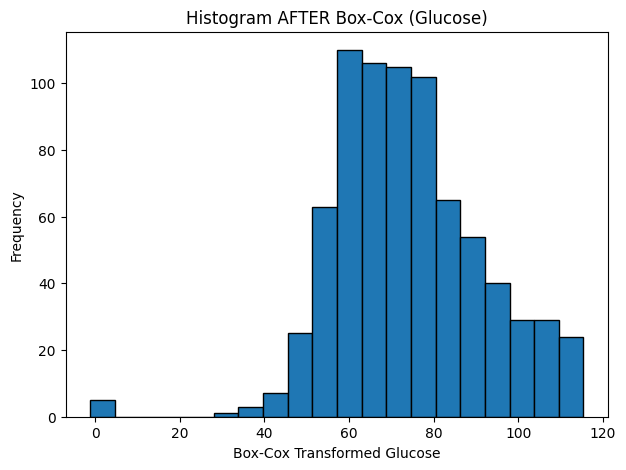

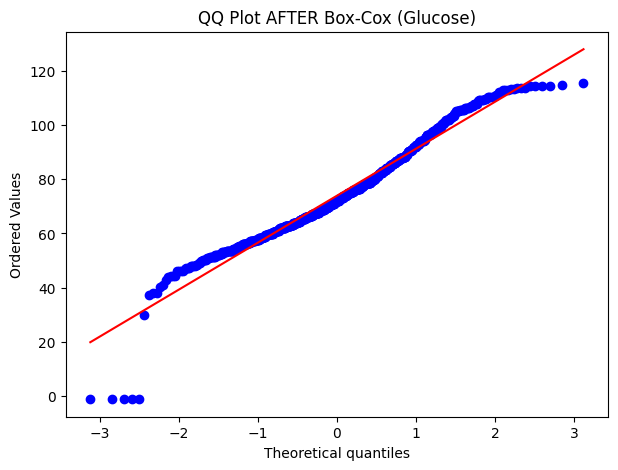

In [9]:
# 5. HISTOGRAM + QQ-PLOT AFTER BOX-COX
# ------------------------------

plt.figure(figsize=(7,5))
plt.hist(x_boxcox, bins=20, edgecolor='black')
plt.title("Histogram AFTER Box-Cox (Glucose)")
plt.xlabel("Box-Cox Transformed Glucose")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(7,5))
stats.probplot(x_boxcox, dist="norm", plot=plt)
plt.title("QQ Plot AFTER Box-Cox (Glucose)")
plt.show()

In [11]:
#6. NORMALITY TEST AFTER BOX-COX

stat_after, p_after = stats.shapiro(x_boxcox)
print("\nShapiro-Wilk AFTER Box-Cox:")
print("Statistic:", stat_after)
print("p-value:", p_after)


Shapiro-Wilk AFTER Box-Cox:
Statistic: 0.9657334957878961
p-value: 1.9705240243832883e-12
